In [67]:
import os
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#my_file = '/Users/carmenromoluque/Desktop/full_body_phantom_coincidences_phot_info_dist_tof_0_2_2_4_4_2.npz'
#
#d   = np.load(my_file)
#df0 = pd.DataFrame({})
#for (key, vals) in d.items():
#    df0[key] = vals
    
filepath = '/Users/carmenromoluque/Desktop/test_df/'
list_coinc = []
for filename in os.listdir(filepath):
    if filename.endswith('.npz'):
        my_file = filepath+filename
        d   = np.load(my_file)
        df0 = pd.DataFrame({})
        for (key, vals) in d.items():
            df0[key] = vals
        list_coinc.append(df0)
df_coinc = pd.concat(list_coinc).reset_index()

In [80]:
df_coinc.tail(10)

,index,a_true_r1,a_true_phi1,a_true_z1,a_true_r2,a_true_phi2,a_true_z2,a_reco_r1,a_reco_phi1,a_reco_z1,...,a_first_time2,a_true_time1,a_true_time2,a_photo1,a_photo2,a_photo_like1,a_photo_like2,a_hit_energy1,a_hit_energy2,a_event_ids
3007,526,394.878905,-2.373018,84.075218,383.110030,0.995489,-111.276726,395.308990,-2.371233,78.066308,...,1440.0,1508.962870,1154.211164,False,False,False,False,0.510999,0.478988,92438
3008,527,385.036548,1.875468,-465.685364,397.007653,-1.468806,356.213623,385.345978,1.875868,-464.493795,...,1950.0,1922.059059,1853.044987,False,False,False,False,0.510999,0.510999,92445
3009,528,402.268880,-1.053674,-227.147812,394.119822,1.889888,220.935669,394.753296,-1.064929,-229.973871,...,1465.0,1659.203291,1381.995797,False,False,False,False,0.503234,0.510999,92452
3010,529,398.214054,2.728950,-109.873451,398.006498,-0.318432,173.476593,397.937927,2.729625,-109.832220,...,1555.0,1463.835835,1364.346623,False,False,True,False,0.510999,0.471090,92466
3011,530,391.805977,1.074662,-585.304810,380.326106,-1.995673,459.152435,391.691010,1.075136,-585.117647,...,2080.0,2593.125105,1748.225212,False,False,False,False,0.482167,0.510999,92469
3012,531,386.325129,-1.728102,-126.870720,385.848285,1.298620,99.986122,386.113159,-1.724559,-127.636832,...,1570.0,1394.673944,1285.801649,False,False,False,False,0.510999,0.510999,92476
3013,532,380.136766,0.713997,40.166630,382.284343,-2.306067,-33.663372,383.091858,0.738689,50.303644,...,1695.0,1214.424491,1335.963011,False,False,False,True,0.510999,0.510999,92480
3014,533,381.461631,2.586413,-305.657928,382.913589,-0.723189,217.388672,386.113159,2.589886,-296.827723,...,1425.0,1851.594567,1230.461717,False,False,False,True,0.510999,0.510999,92492
3015,534,382.736659,-0.831619,-131.620819,401.953686,1.936596,119.387856,383.650940,-0.833170,-132.119588,...,1415.0,1358.152747,1346.689939,False,False,True,True,0.510999,0.510999,92524
3016,535,404.466208,-1.419896,237.435852,397.745255,1.597817,-102.680504,404.242737,-1.420614,237.182081,...,1670.0,1392.872572,1508.860350,False,False,True,False,0.510999,0.510999,92531


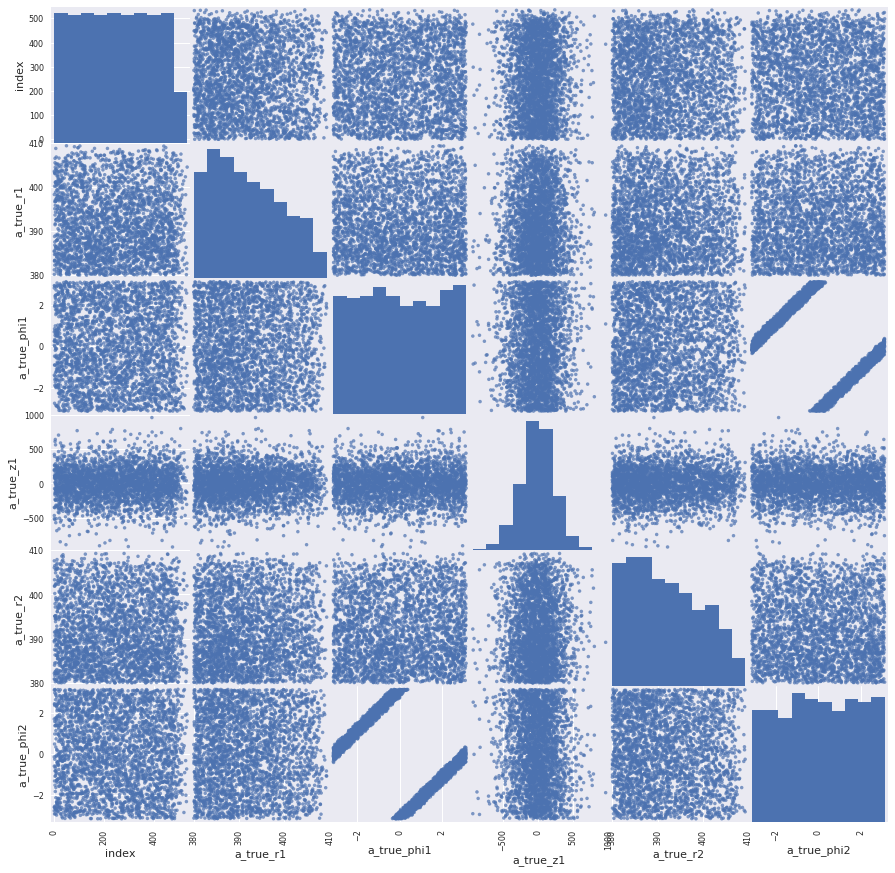

In [76]:
small_df0 = df_coinc[df_coinc.columns[0:6]]
small_df0.head()
pd.plotting.scatter_matrix(small_df0, figsize=(15, 15), alpha=0.7);

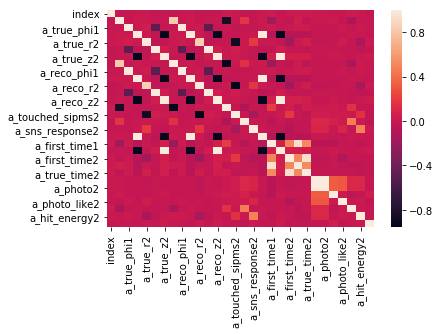

In [70]:
sns.heatmap(df_coinc.corr());

In [81]:
df_coinc['a_true_x1'] = df_coinc.a_true_r1*np.cos(df_coinc.a_true_phi1)
df_coinc['a_true_y1'] = df_coinc.a_true_r1*np.sin(df_coinc.a_true_phi1)
df_coinc['a_true_x2'] = df_coinc.a_true_r2*np.cos(df_coinc.a_true_phi2)
df_coinc['a_true_y2'] = df_coinc.a_true_r2*np.sin(df_coinc.a_true_phi2)
df_coinc['a_reco_x1'] = df_coinc.a_reco_r1*np.cos(df_coinc.a_reco_phi1)
df_coinc['a_reco_y1'] = df_coinc.a_reco_r1*np.sin(df_coinc.a_reco_phi1)
df_coinc['a_reco_x2'] = df_coinc.a_reco_r2*np.cos(df_coinc.a_reco_phi2)
df_coinc['a_reco_y2'] = df_coinc.a_reco_r2*np.sin(df_coinc.a_reco_phi2)

In [83]:
df_coinc.head()

,index,a_true_r1,a_true_phi1,a_true_z1,a_true_r2,a_true_phi2,a_true_z2,a_reco_r1,a_reco_phi1,a_reco_z1,...,a_hit_energy2,a_event_ids,a_true_x1,a_true_y1,a_true_x2,a_true_y2,a_reco_x1,a_reco_y1,a_reco_x2,a_reco_y2
0,0,381.230402,2.832259,201.521652,380.885674,-0.586541,-208.477844,381.410065,2.830105,202.466223,...,0.510999,7,-363.135927,116.055702,317.224462,-210.813976,-363.056128,116.892624,319.332934,-209.427300
1,1,384.684475,0.251873,78.889198,401.927310,-2.906063,-196.841690,384.908600,0.255415,78.024469,...,0.470485,11,372.546652,95.870382,-390.830479,-93.792850,372.421621,97.245907,-381.474023,-92.646585
2,2,387.544754,0.338773,-523.862793,395.057017,3.133178,370.940186,386.238068,0.338186,-524.458215,...,0.510999,33,365.517979,128.792651,-395.043030,3.324324,364.360777,128.144721,-395.165079,3.784122
3,3,402.960479,1.953204,71.371284,397.907100,-1.508255,-169.790497,402.708893,1.953848,71.255633,...,0.510999,59,-150.366945,373.854147,24.869606,-397.129155,-150.513609,373.523903,24.467374,-397.329796
4,4,404.434922,0.994412,252.475815,397.158943,-1.816317,-202.028137,404.444489,0.993726,252.411765,...,0.510999,73,220.415256,339.093959,-96.534000,-385.248518,220.653354,338.950500,-96.764096,-385.523733


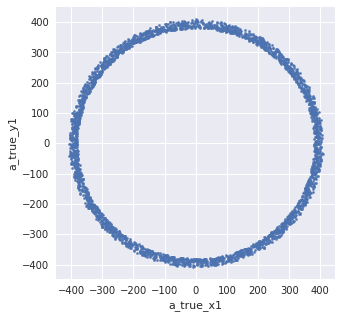

In [88]:
df_coinc.plot(kind='scatter', x='a_true_x1', y='a_true_y1', s=5, figsize=(5,5));

In [61]:
my_dict = {'claire': 26, 'aleks': 23, 'gracia': 25, 'carmen': 26}
my_dict.keys()
my_dict.values()
my_dict.items()

dict_items([('claire', 26), ('aleks', 23), ('gracia', 25), ('carmen', 26)])

In [62]:
my_dataframe = pd.DataFrame({})
for (key, vals) in my_dict.items():
    my_dataframe[key] = vals

In [28]:
## df0.a_true_r1 == df0['a_true_r1']

In [32]:
df0[['a_true_r1', 'a_true_r2']].head()

,a_true_r1,a_true_r2
0,381.230402,380.885674
1,384.684475,401.927310
2,387.544754,395.057017
3,402.960479,397.907100
4,404.434922,397.158943


In [34]:
df0.std()

a_true_r1               7.511721
a_true_phi1             1.853171
a_true_z1             238.728769
a_true_r2               7.534152
a_true_phi2             1.800281
a_true_z2             242.181998
a_reco_r1               7.047529
a_reco_phi1             1.852461
a_reco_z1             240.324694
a_reco_r2               6.974812
a_reco_phi2             1.798871
a_reco_z2             243.444356
a_touched_sipms1       39.823049
a_touched_sipms2       40.063915
a_sns_response1        49.708853
a_sns_response2        49.385463
a_first_sipm1       12652.005454
a_first_time1         330.647906
a_first_sipm2       12837.114840
a_first_time2         320.774126
a_true_time1          312.133599
a_true_time2          302.393787
a_photo1                0.241199
a_photo2                0.241199
a_photo_like1           0.462726
a_photo_like2           0.475598
a_hit_energy1           0.019618
a_hit_energy2           0.016335
a_event_ids         15026.667005
dtype: float64

In [35]:
#bikes.groupby([bikes.index.year, bikes.index.month]).mean().total_rentals.plot()
df0.groupby([df0.a_true_r1 > 400])

In [65]:
df0[(df0.a_true_r1.any()) & (df0.a_true_r2 > 400)].head()

,a_true_r1,a_true_phi1,a_true_z1,a_true_r2,a_true_phi2,a_true_z2,a_reco_r1,a_reco_phi1,a_reco_z1,a_reco_r2,...,a_first_time2,a_true_time1,a_true_time2,a_photo1,a_photo2,a_photo_like1,a_photo_like2,a_hit_energy1,a_hit_energy2,a_event_ids
2,383.427503,-0.908829,-145.777634,400.218837,2.355317,80.995247,383.388153,-0.904793,-142.844622,388.878967,...,1870.0,1113.244534,1603.256941,False,False,False,False,0.510999,0.510999,60055
5,401.106010,2.481479,286.813324,404.898264,-0.835229,-133.386810,398.413300,2.463252,294.148305,401.031250,...,1545.0,1547.872424,1484.524012,False,False,False,False,0.510999,0.464517,60091
11,397.997884,0.738229,154.743576,407.903461,-2.502223,-230.683853,389.904205,0.771958,178.842391,396.765106,...,1575.0,1482.789278,1494.064212,False,False,False,False,0.510999,0.510999,60165
12,392.676996,2.928302,-49.563595,406.036534,-0.375762,114.590889,393.323273,2.928004,-49.742982,401.168030,...,1495.0,1240.080595,1471.224189,False,False,True,False,0.510999,0.510999,60189
13,394.181991,-1.647474,-29.043032,403.148948,1.382554,3.903640,393.744904,-1.648224,-29.263460,403.379456,...,1565.0,1225.187778,1439.111829,False,False,True,False,0.510999,0.482296,60198


In [44]:
df0.keys().values

array(['a_true_r1', 'a_true_phi1', 'a_true_z1', 'a_true_r2',
       'a_true_phi2', 'a_true_z2', 'a_reco_r1', 'a_reco_phi1',
       'a_reco_z1', 'a_reco_r2', 'a_reco_phi2', 'a_reco_z2',
       'a_touched_sipms1', 'a_touched_sipms2', 'a_sns_response1',
       'a_sns_response2', 'a_first_sipm1', 'a_first_time1',
       'a_first_sipm2', 'a_first_time2', 'a_true_time1', 'a_true_time2',
       'a_photo1', 'a_photo2', 'a_photo_like1', 'a_photo_like2',
       'a_hit_energy1', 'a_hit_energy2', 'a_event_ids'], dtype=object)

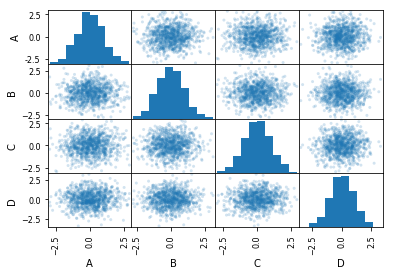

In [49]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2);